# Introduction to Data Science: Assignment 1
## Maksim Kaledin

In this report I will describe the building of the prediction model based on Students http://archive.ics.uci.edu/ml/datasets/Student+Performance dataset.

## Data Description and Problem Formulation

The data describes the midterm and final marks of Portuguese students studying Portuguese or math (In this report I analyze Portuguese dataset but the same analysis could be performed for math). We have 30 input features, most of them are categorical and non-categorical can easily be interpreted as categorical (for example, education levels):

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

Marks are given as
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target.)

Our goal is to construct prediction model for G3 with maximal accuracy considering all other features (except G1,G2).

## Preliminary Data Analysis

First, download the data and check for missing values (they may be encoded not with NaN, so use another approach). 

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dataFrame = pd.read_csv("./student/student-por.csv",sep=";")

for i in range(0,len(dataFrame.columns)):
    print(pd.unique(dataFrame[dataFrame.columns[i]]))

['GP' 'MS']
['F' 'M']
[18 17 15 16 19 22 20 21]
['U' 'R']
['GT3' 'LE3']
['A' 'T']
[4 1 3 2 0]
[4 1 2 3 0]
['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']
['course' 'other' 'home' 'reputation']
['mother' 'father' 'other']
[2 1 3 4]
[2 3 1 4]
[0 3 1 2]
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['no' 'yes']
[4 5 3 1 2]
[3 2 4 1 5]
[4 3 2 1 5]
[1 2 5 3 4]
[1 3 2 4 5]
[3 5 1 2 4]
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
[ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
[11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]
[11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]


Let us check the marks in different groups using boxplots.

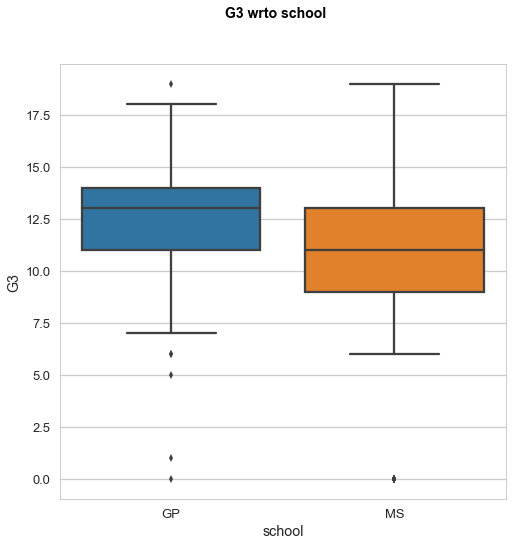

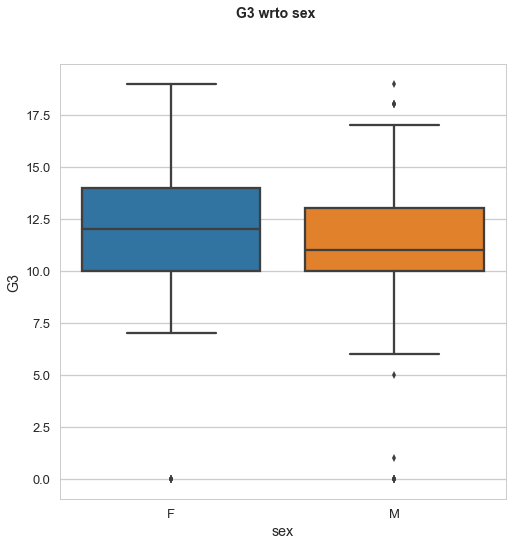

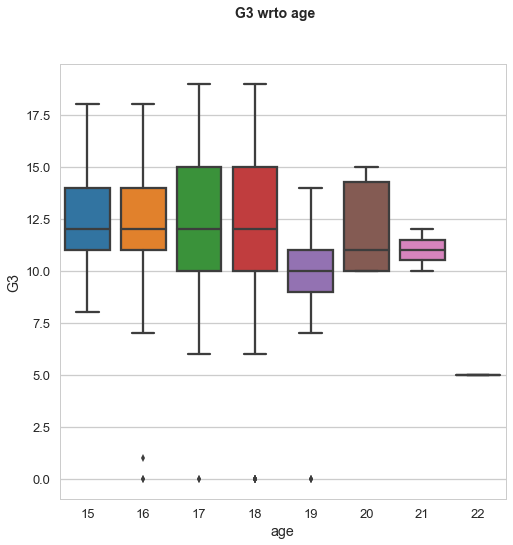

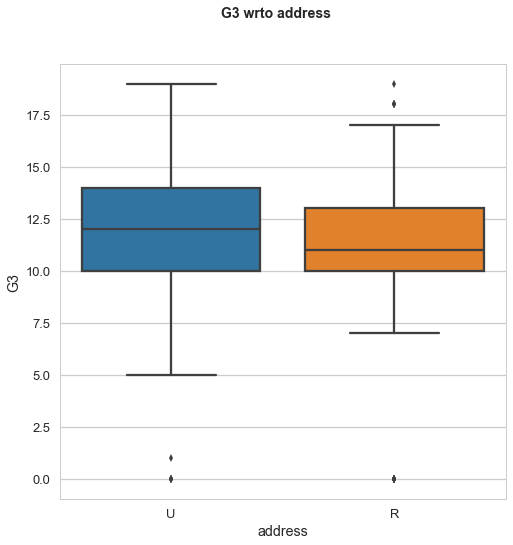

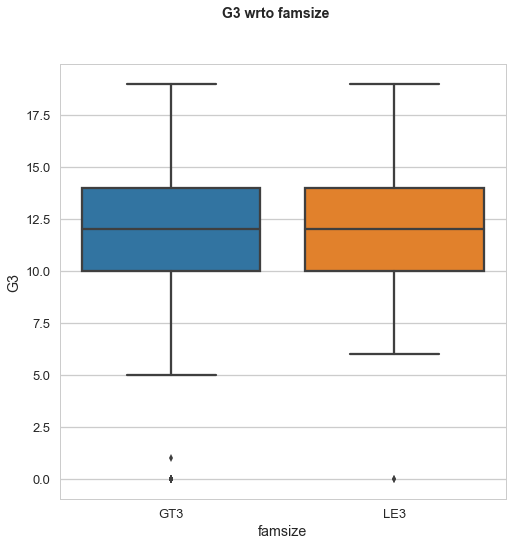

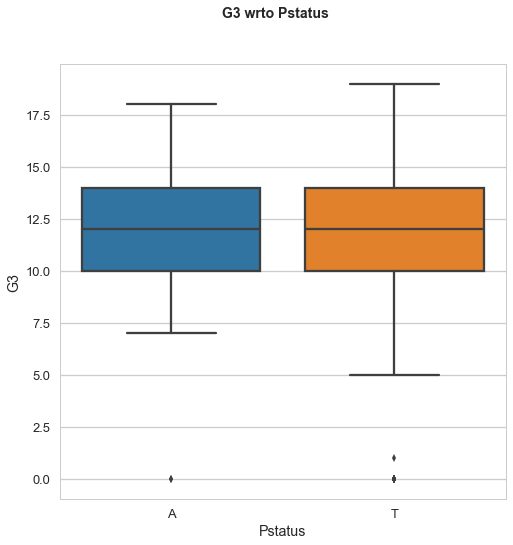

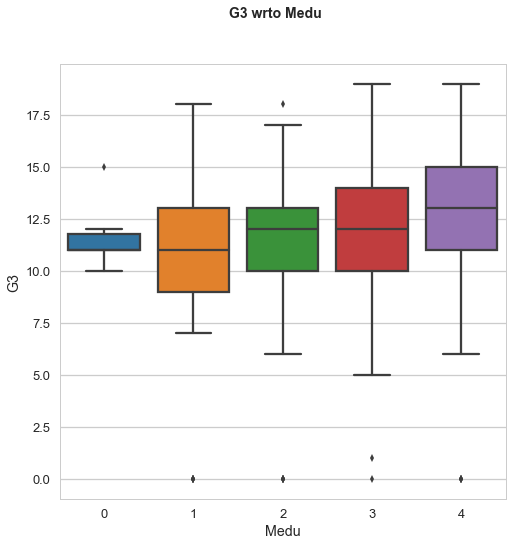

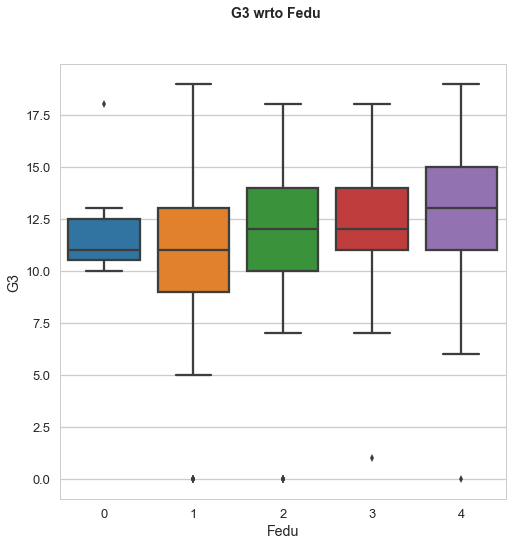

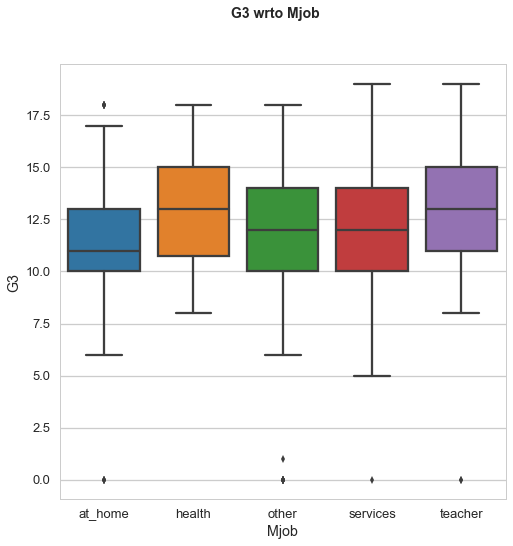

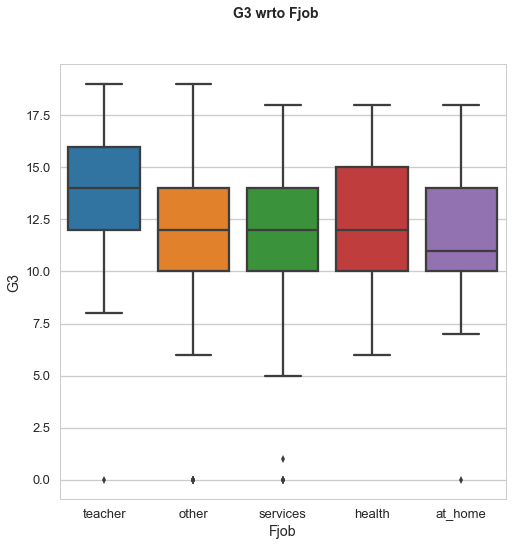

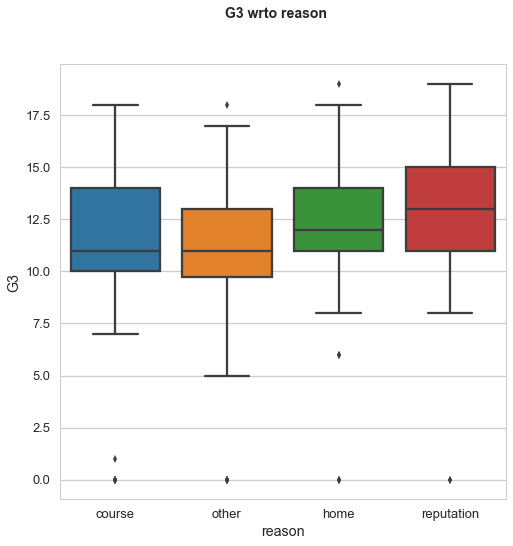

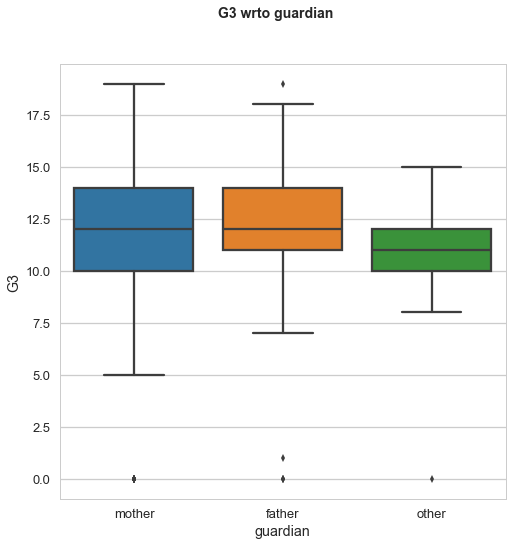

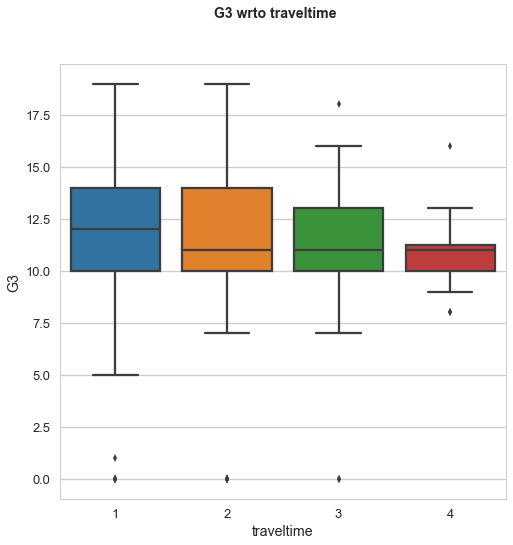

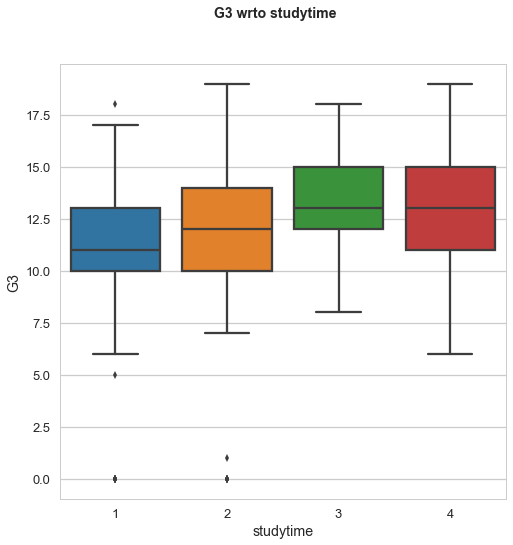

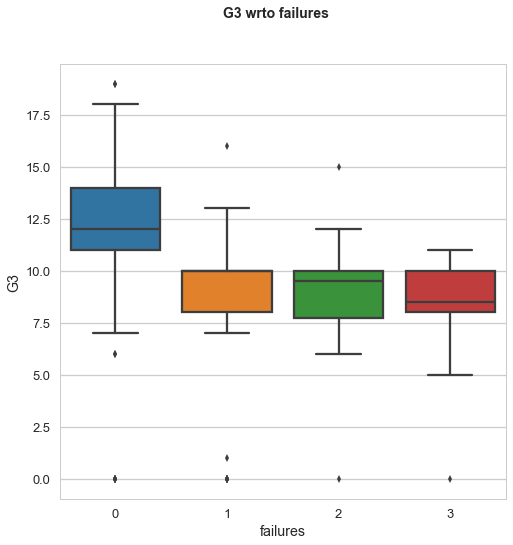

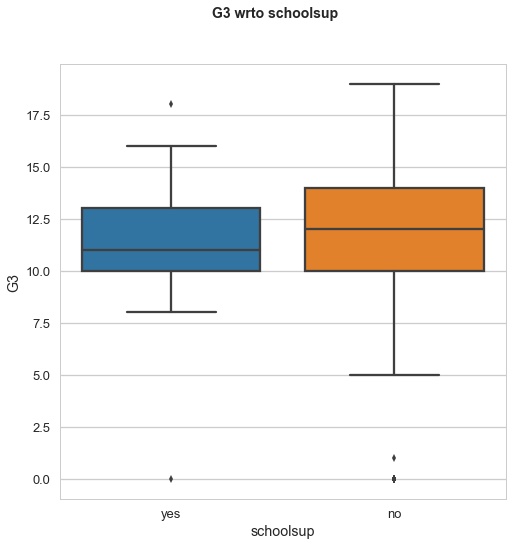

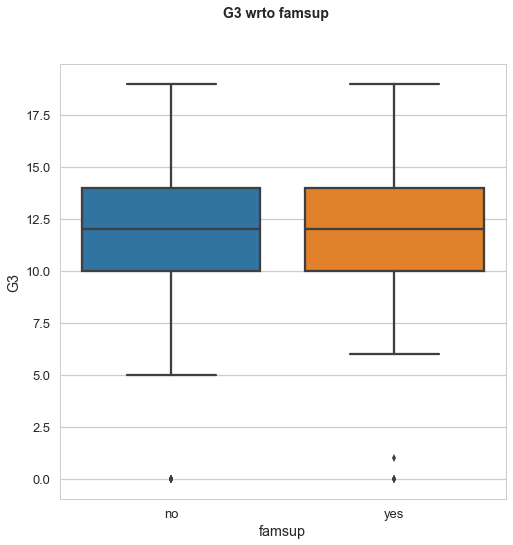

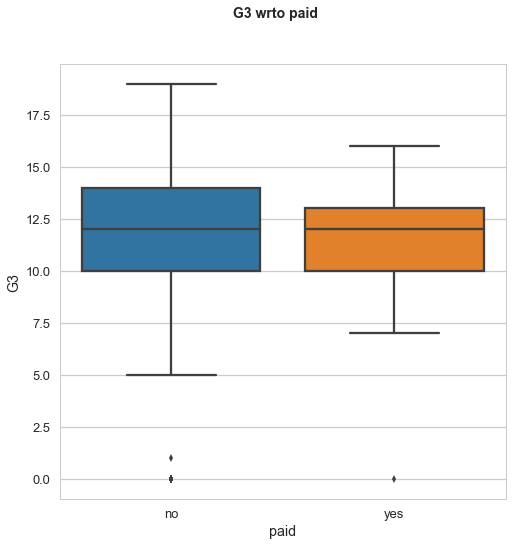

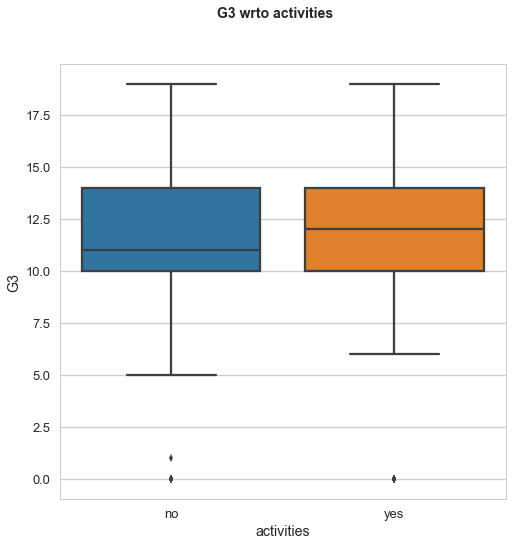

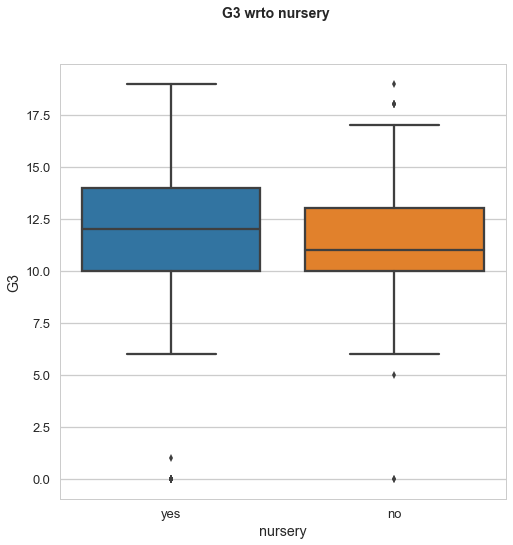

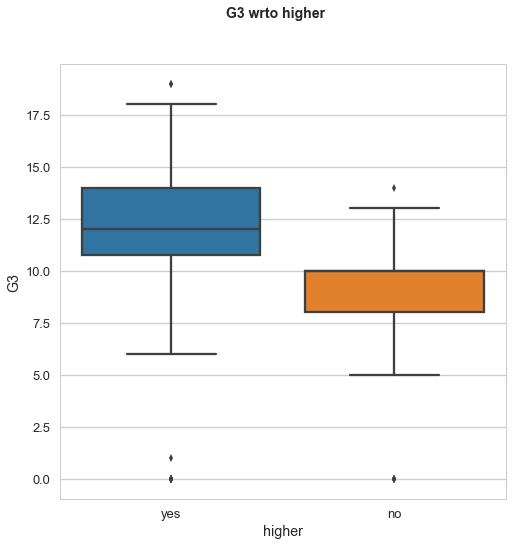

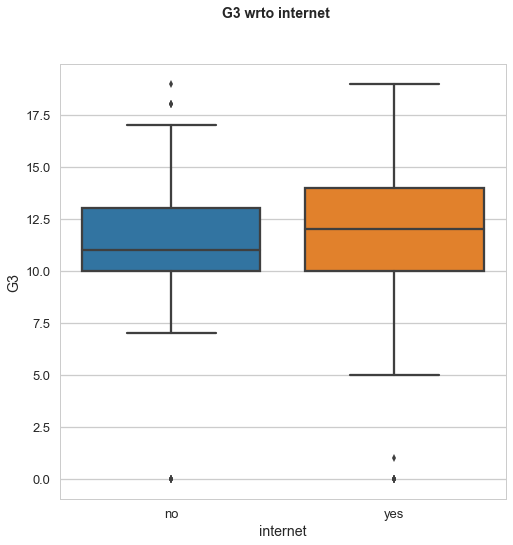

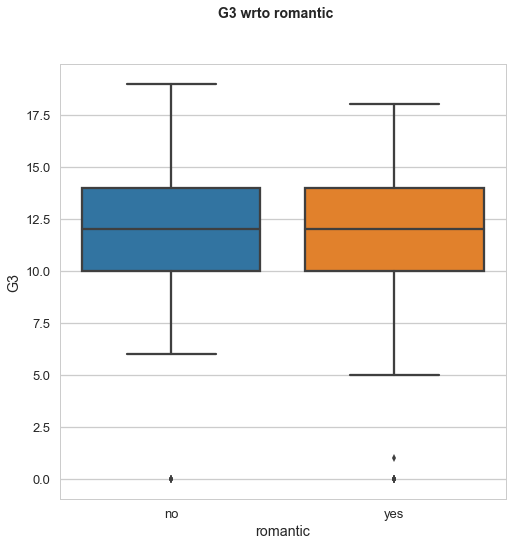

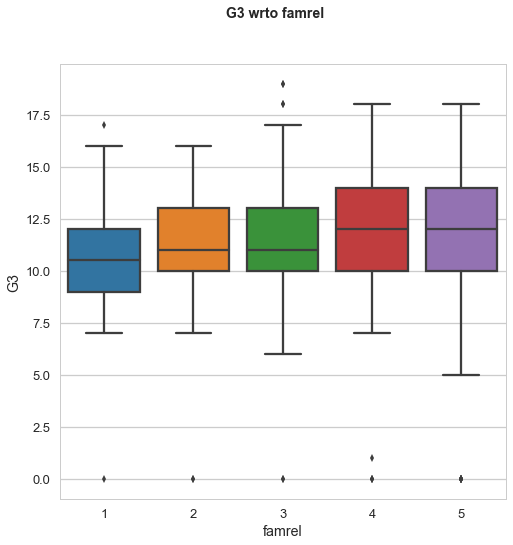

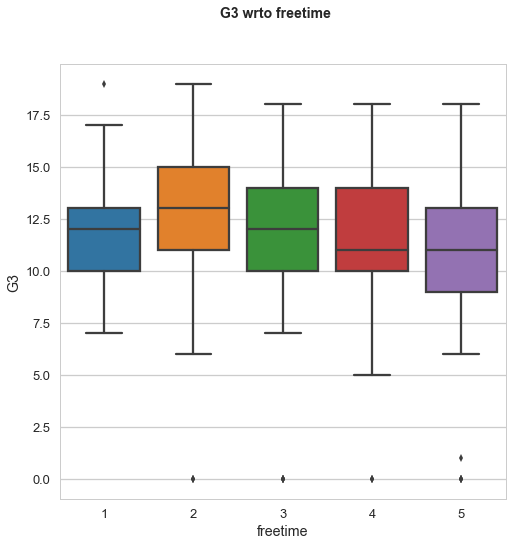

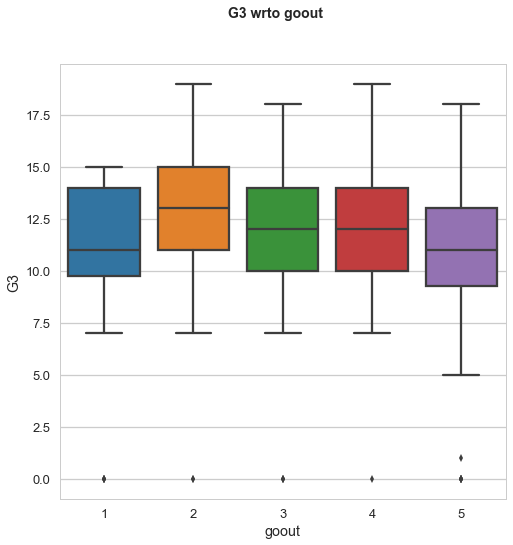

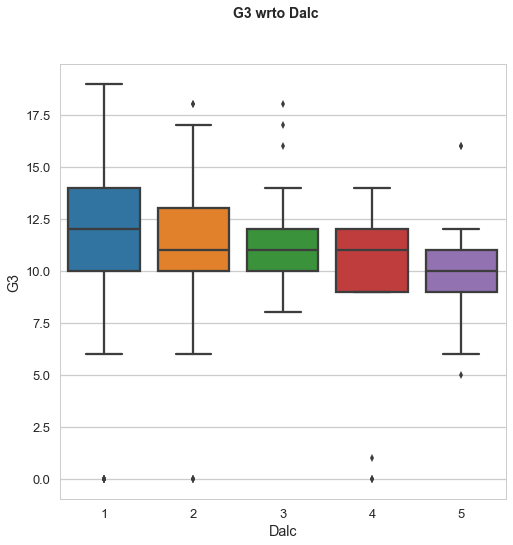

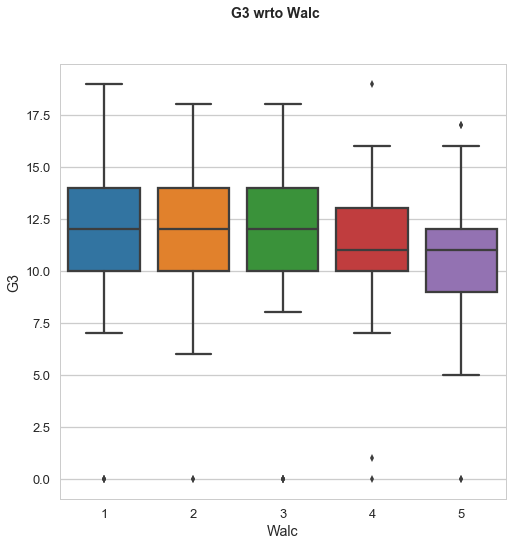

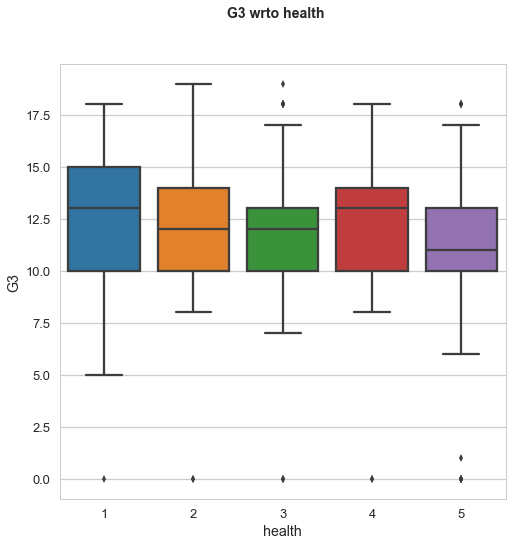

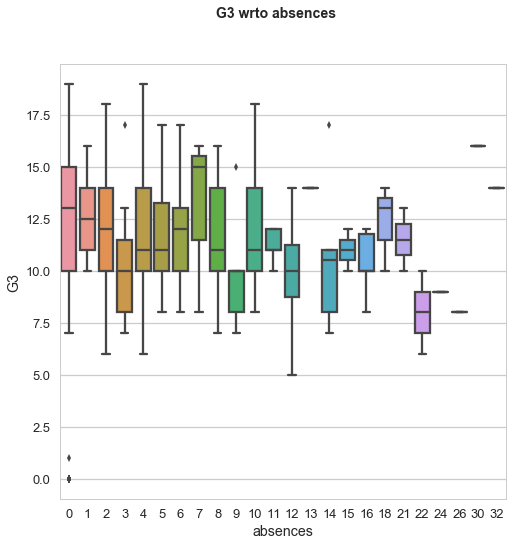

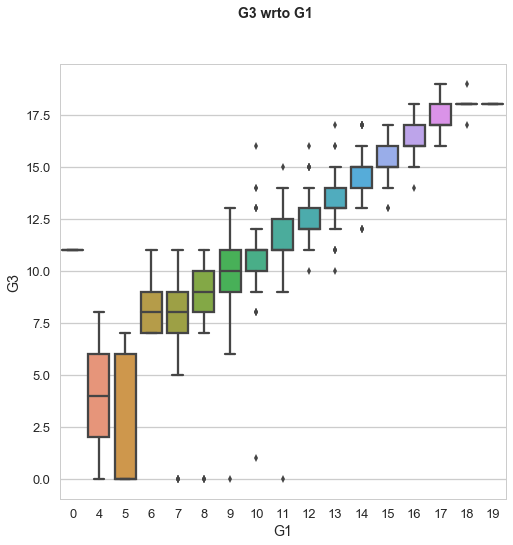

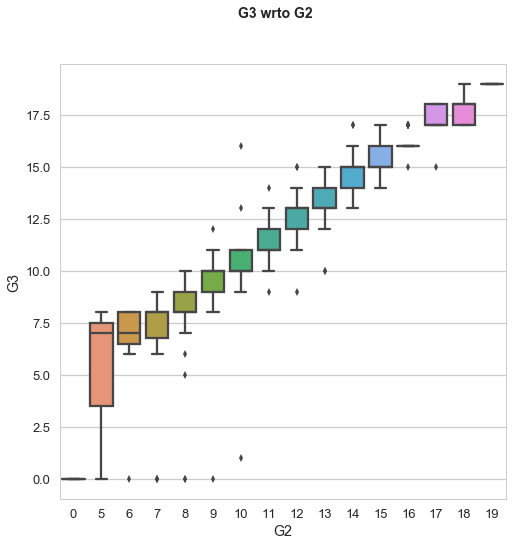

In [4]:
def MakeBoxPlot(X,Y,title):
    fig = plt.figure(figsize=(8,8))
    fig.suptitle(title, fontsize=14, fontweight='bold')
    sns.set_style("whitegrid")

    sns.set_context("talk")
    ax = sns.boxplot(x=X, y=Y)
    plt.show()
    
colNames=list(dataFrame)
for i in range(0,len(colNames)-1):#not including G3
        MakeBoxPlot(dataFrame[colNames[i]],dataFrame[colNames[-1]],"G3 wrto "+colNames[i])

We can see that there are no significant obvious dependencies except Education level (all three), failures, study time and Fjob. However there might be not obvious dependencies among the other features. Consider the correlation (and partial correlation) matrix of features.

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


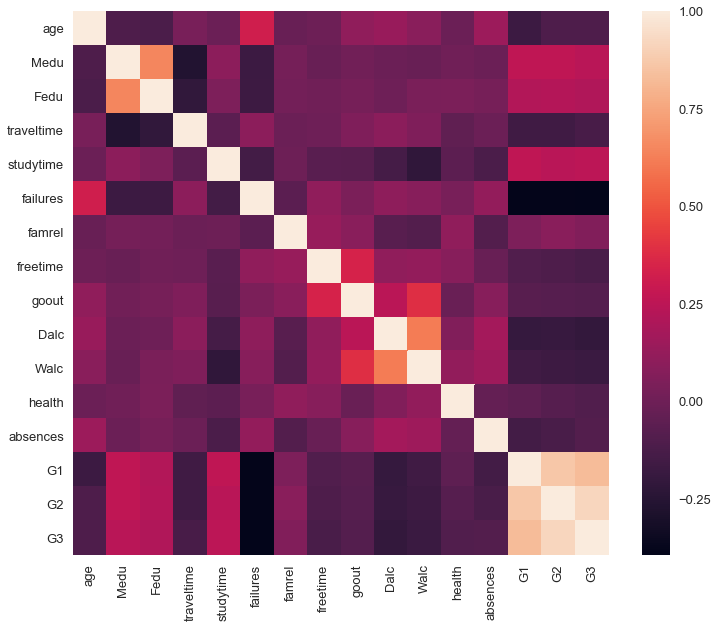

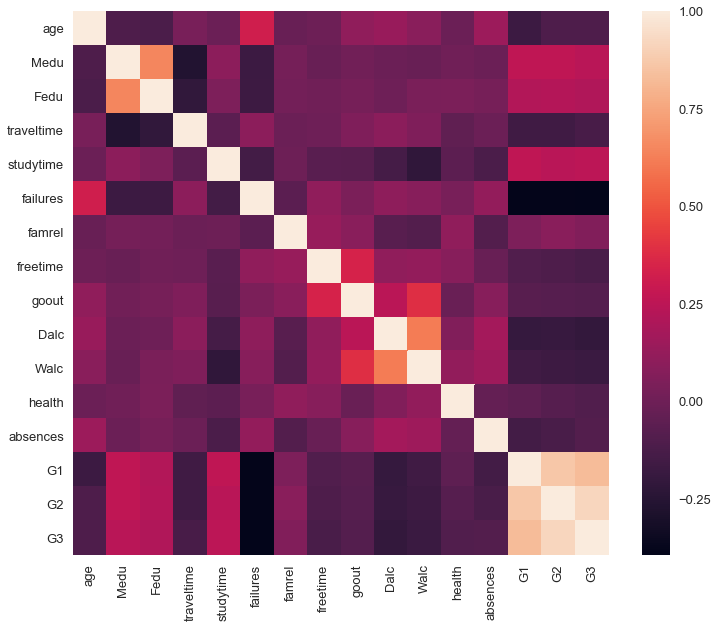

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(dataFrame.corr())
print(dataFrame.head())
plt.show()